In [2]:
from main import RecyclingModel
from mesa.batchrunner import BatchRunner
import pandas as pd

This jupyter notebook format was used to get the results for the sensitivity analysis and the extreme conditions test.
In order to complete the sensitivity analysis, the parameter in question must become a model variable. The model code was changed in order to complete the extreme value and the sensitivity test. Therefor, the results are not directly reproducable, only when you change the model code in the correct order.

In [2]:
variable_params = {"budget" : [0.1,1,10]}
model_reporters = {"Waste Rotterdam": lambda self: self.waste_count_municipality("Rotterdam"),
            "Waste Vlaardingen": lambda self: self.waste_count_municipality("Vlaardingen"),
            "Waste Schiedam": lambda self: self.waste_count_municipality("Schiedam"),
            "Recycled plastic waste Rotterdam": lambda self: self.recycled_plastic_waste_municipality("Rotterdam"),
            "Recycled plastic waste Vlaardingen": lambda self: self.recycled_plastic_waste_municipality("Vlaardingen"),
            "Recycled plastic waste Schiedam": lambda self: self.recycled_plastic_waste_municipality("Schiedam"),
            "Percentage recycled Rotterdam": lambda self: self.recycled_plastic_waste_municipality(
                "Rotterdam") / self.waste_count_municipality("Rotterdam") if self.recycled_plastic_waste_municipality(
                "Rotterdam") != 0 else 0,
            "Percentage recycled Vlaardingen": lambda self: self.recycled_plastic_waste_municipality(
                "Vlaardingen") / self.waste_count_municipality("Vlaardingen") if self.recycled_plastic_waste_municipality(
                "Vlaardingen") != 0 else 0,
            "Percentage recycled Schiedam": lambda self: self.recycled_plastic_waste_municipality(
                "Schiedam")/ self.waste_count_municipality("Schiedam") if self.recycled_plastic_waste_municipality(
                "Schiedam") != 0 else 0}

batch_run = BatchRunner(RecyclingModel,
                        variable_params,
                        iterations=50,
                        max_steps=240,
                        model_reporters=model_reporters)
batch_run.run_all()

150it [44:13, 17.69s/it]


In [3]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
run_data.to_csv('E4')

In [4]:
run_data[90:110]

,budget,Run,Percentage recycled Rotterdam,Percentage recycled Schiedam,Percentage recycled Vlaardingen,Recycled plastic waste Rotterdam,Recycled plastic waste Schiedam,Recycled plastic waste Vlaardingen,Waste Rotterdam,Waste Schiedam,Waste Vlaardingen
90,1.0,90,0.048566,0.043807,0.044226,442.472181,93.295112,40.784381,9110.789432,2129.694532,922.174365
91,1.0,91,0.047103,0.045806,0.041353,428.761302,97.239073,37.795672,9102.672720,2122.866870,913.979138
92,1.0,92,0.048380,0.046303,0.048506,441.472065,98.401755,44.365351,9125.152518,2125.154694,914.631761
93,1.0,93,0.046953,0.040926,0.047434,427.108346,87.237241,43.278452,9096.513834,2131.574189,912.397923
94,1.0,94,0.048427,0.045329,0.042796,441.559815,95.722559,38.698084,9118.083417,2111.742037,904.238028
95,1.0,95,0.048773,0.043920,0.050118,445.212450,93.544951,45.196058,9128.304815,2129.870182,901.801266
96,1.0,96,0.047074,0.045019,0.045398,430.317400,96.078010,41.406380,9141.308165,2134.166393,912.073940
97,1.0,97,0.047929,0.044144,0.047252,437.974584,93.675128,43.106906,9138.043554,2122.040463,912.267235
98,1.0,98,0.048476,0.047812,0.042868,442.935693,102.001302,39.196779,9137.169848,2133.386533,914.358666
99,1.0,99,0.046392,0.050626,0.040589,423.426293,107.249394,36.809844,9127.183388,2118.454022,906.885788


In [3]:
df = pd.read_csv('E3')
df = pd.DataFrame(df).set_index('Unnamed: 0')
df.reset_index(drop=True, inplace=True)

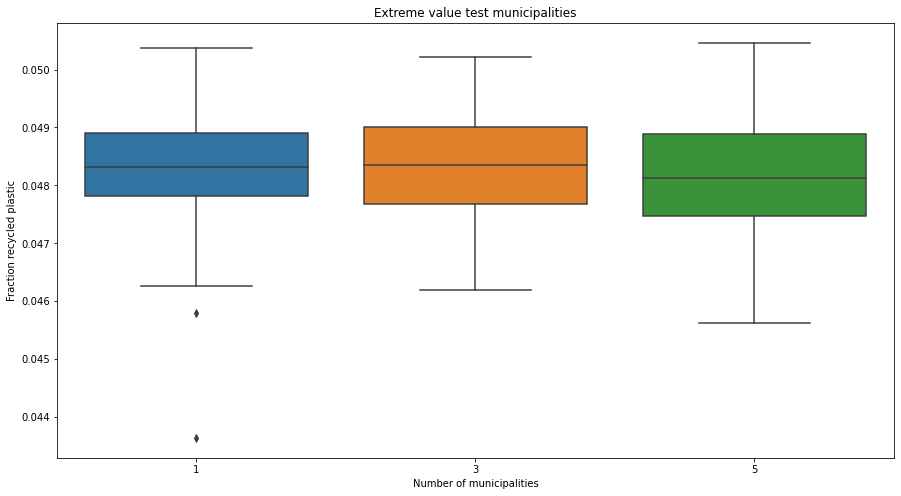

In [8]:
df_melted = pd.melt(df, id_vars=['munn'], value_vars=['Percentage recycled Rotterdam'])

df_melted = df_melted.rename(columns={"munn": "municipalities"})

import matplotlib.pyplot as plt
import seaborn as sns
df_melted.head()

# new data frame with split value columns
new = df_melted["variable"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
df_melted["First Name"]= new[0]
  
# making separate last name column from new data frame
df_melted["Last Name"]= new[1]
  
# Dropping old Name columns
df_melted.drop(columns =["variable"], inplace = True)
df_melted

new = df_melted["Last Name"].str.split(" ", n = 1, expand = True)
df_melted["Municipality"]= new[1]
df_melted.drop(columns =["First Name"], inplace = True)
df_melted.drop(columns =["Last Name"], inplace = True)
df_melted

#create seaborn boxplots by group
#sns.boxplot(x='variable', y='value', data=df_melted).set(title='Points by Team')
plt.figure(figsize=(15,8))
sns.boxplot(x='municipalities', y='value', data=df_melted).set(title='Extreme value test municipalities')

#modify axis labels
plt.xlabel('Number of municipalities')
plt.ylabel('Fraction recycled plastic')

plt.savefig('e3.png')